<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>


In [1]:
import numpy as np
import pandas as pd

    
| Column | Description |
| :------: | :---: |
| <code>InvoiceNumber</code> | A unique 6-digit number assigned to each invoice. If this number starts with the letter 'C', the invoice is canceled. |
| <code>ProductCode</code> | A unique 5-digit number assigned to each type of product. |
| <code>ProductName</code> | The name of the product. |
| <code>Quantity</code> | The quantity of a specific product ordered in the invoice. |
| <code>InvoiceDate</code> | The date the invoice was created. |
| <code>UnitPrice</code> | The price per unit of a product. |
| <code>CustomerID</code> | A unique 5-digit number assigned to each customer. |
| <code>Country</code> | The name of the country where the customer resides. |


In [2]:
import openpyxl
df = pd.read_excel('sales.xlsx')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df_no_missing_CustomerId = df.copy()

df_no_missing_CustomerId = df_no_missing_CustomerId.dropna(how = 'all', subset = ['CustomerId'])

df_no_missing_CustomerId.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_no_missing_CustomerId.isna().sum()

InvoiceNumber    0
ProductCode      0
ProductName      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerId       0
Country          0
dtype: int64

In [5]:
df_no_duplicate = df_no_missing_CustomerId.copy()

df_no_duplicate = df_no_duplicate.drop_duplicates()

df_no_duplicate

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
df_no_missing_price = df_no_duplicate.copy()

df_no_missing_price = df_no_missing_price[df_no_missing_price['UnitPrice'] > 0]

df_no_missing_price.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
percentage_cancelled_orders = round((df_no_missing_price[df_no_missing_price['InvoiceNumber'].str.lower().str.contains('c', na=False)].InvoiceNumber.nunique() * 100)/len(df_no_missing_price['InvoiceNumber'].unique())) 
percentage_cancelled_orders

19

In [8]:
df_tmp = df_no_missing_price.copy()
df_tmp.CustomerId = df_tmp.CustomerId.apply(lambda id: str(int(id)))

cancelled_orders_per_customer = df_tmp[df_tmp['InvoiceNumber'].str.lower().str.startswith('c', na=False)].groupby('CustomerId').nunique()

top_cancelling_customers = cancelled_orders_per_customer.sort_values(by=['InvoiceNumber'], ascending=False).head(5).index.to_list()

top_cancelling_customers

['14911', '14527', '15311', '14156', '17841']

In [9]:
df_no_canceled_invoice = df_no_missing_price.copy()

df_no_canceled_invoice = df_no_canceled_invoice.drop(df_no_canceled_invoice[df_no_canceled_invoice['InvoiceNumber'].astype(str).str.startswith('C')].index)

df_no_canceled_invoice.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df_no_canceled_invoice.to_csv("preprocessed_sales.csv", index=False)

In [11]:
remaining_invoices = pd.Series(df_no_canceled_invoice['InvoiceNumber'].unique())
remaining_invoices

0        489434
1        489435
2        489436
3        489437
4        489438
          ...  
19208    538167
19209    538168
19210    538169
19211    538170
19212    538171
Length: 19213, dtype: object

In [12]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
number_of_orders = df.InvoiceNumber.unique().size
number_of_orders

19213

In [14]:
window_period = (df['InvoiceDate'].min(), df['InvoiceDate'].max())
window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

C:\Users\Ada\AppData\Local\Temp\ipykernel_17812\1987360310.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_orders_per_day = df.groupby('DayOfWeek')['InvoiceNumber'].nunique()


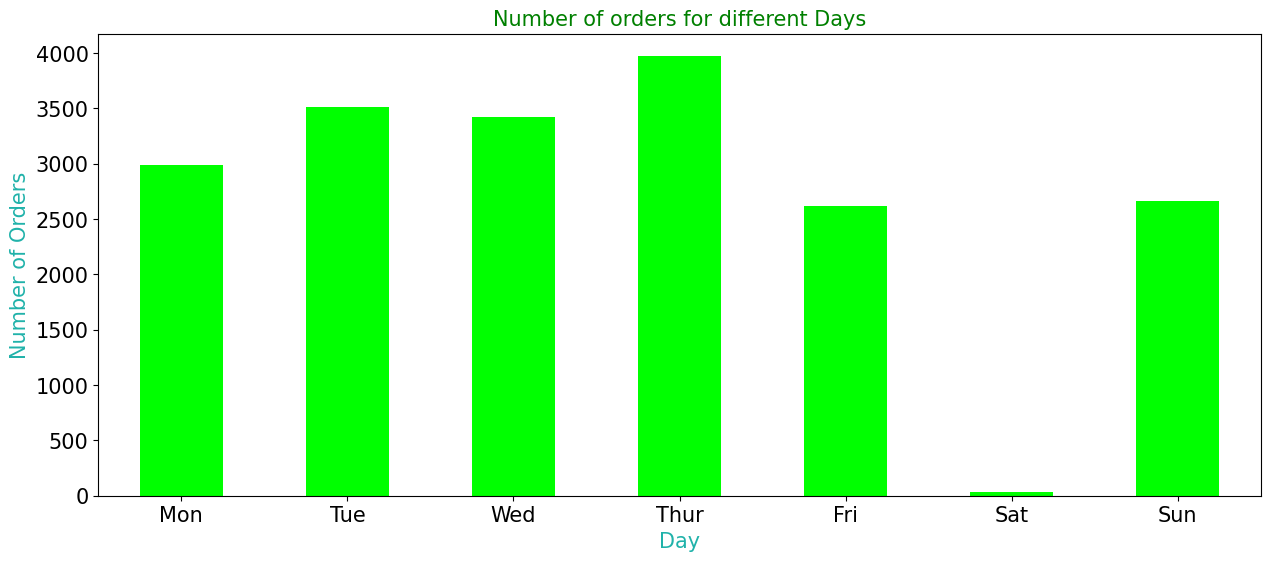

In [15]:
import matplotlib.pyplot as plt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

days_of_week_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%a')  # دریافت مخفف 3 حرف اول از نام روزها به زبان انگلیسی
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: 'Thur' if x == 'Thu' else x)  # تغییر "Thu" به "Thur"
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days_of_week_order, ordered=True)  # ترتیب دادن روزها از دوشنبه

unique_orders_per_day = df.groupby('DayOfWeek')['InvoiceNumber'].nunique()

fig1, ax1 = plt.subplots(figsize=(15, 6))
unique_orders_per_day.plot(kind='bar', color='lime', ax=ax1)

ax1.set_xlabel('Day', fontsize=15, color='lightseagreen')
ax1.set_ylabel('Number of Orders', fontsize=15, color='lightseagreen')
ax1.set_title('Number of orders for different Days', fontsize=15, color='green')
ax1.tick_params(axis='x', labelrotation=0, labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

plt.show()


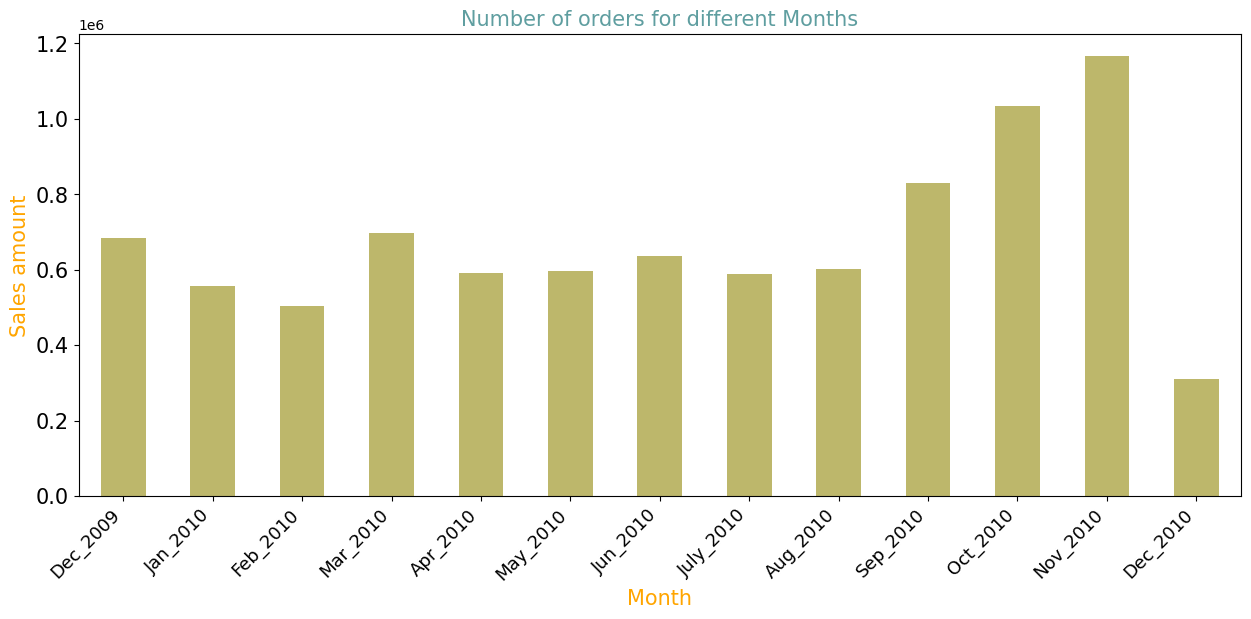

In [16]:
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

monthly_sales = df.groupby([df['InvoiceDate'].dt.year.rename('Year'), df['InvoiceDate'].dt.month.rename('Month')])['TotalSales'].sum()

monthly_sales.index = pd.to_datetime(monthly_sales.index.get_level_values('Year').astype(str) + '-' + monthly_sales.index.get_level_values('Month').astype(str) + '-01')

fig2, ax2 = plt.subplots(figsize=(15, 6))
monthly_sales.plot(kind='bar', color='darkkhaki', ax=ax2)

ax2.set_xlabel('Month', fontsize=15, color='orange')
ax2.set_ylabel('Sales amount', fontsize=15, color='orange')
ax2.set_title('Number of orders for different Months', fontsize=15, color='cadetblue')
ax2.tick_params(axis='y', labelsize=15)

plt.xticks(rotation=45, ha='right')
labels = [f"{date.strftime('%b')}_{date.year}" if date.month != 7 else f"July_{date.year}" for date in monthly_sales.index]
ax2.set_xticklabels(labels, fontsize=13)

plt.show()


In [17]:
df = pd.read_csv('preprocessed_sales.csv')
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [18]:
df = df[df['Country'] != 'United Kingdom']

df['Sales'] = df['Quantity'] * df['UnitPrice']

df_new = df.groupby('Country').agg({'Sales': 'sum', 'CustomerId': 'nunique'}).reset_index()

qSA = df_new['Sales'].quantile(0.75)
qCC = df_new['CustomerId'].quantile(0.75)

def assign_group(row):
    if row['Sales'] > qSA and row['CustomerId'] > qCC:
        return 'Highest customer & revenue'
    elif row['Sales'] < qSA and row['CustomerId'] > qCC:
        return 'High customer & low revenue'
    elif row['Sales'] > qSA and row['CustomerId'] < qCC:
        return 'High revenue & low customer'
    else:
        return 'Low customer & revenue'
    
df_new['group'] = df_new.apply(assign_group, axis=1)


C:\Users\Ada\AppData\Local\Temp\ipykernel_17812\523075378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [19]:
df_new['Country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Denmark', 'EIRE', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Lithuania', 'Malta', 'Netherlands', 'Nigeria',
       'Norway', 'Poland', 'Portugal', 'RSA', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'Thailand', 'USA', 'United Arab Emirates',
       'Unspecified', 'West Indies'], dtype=object)

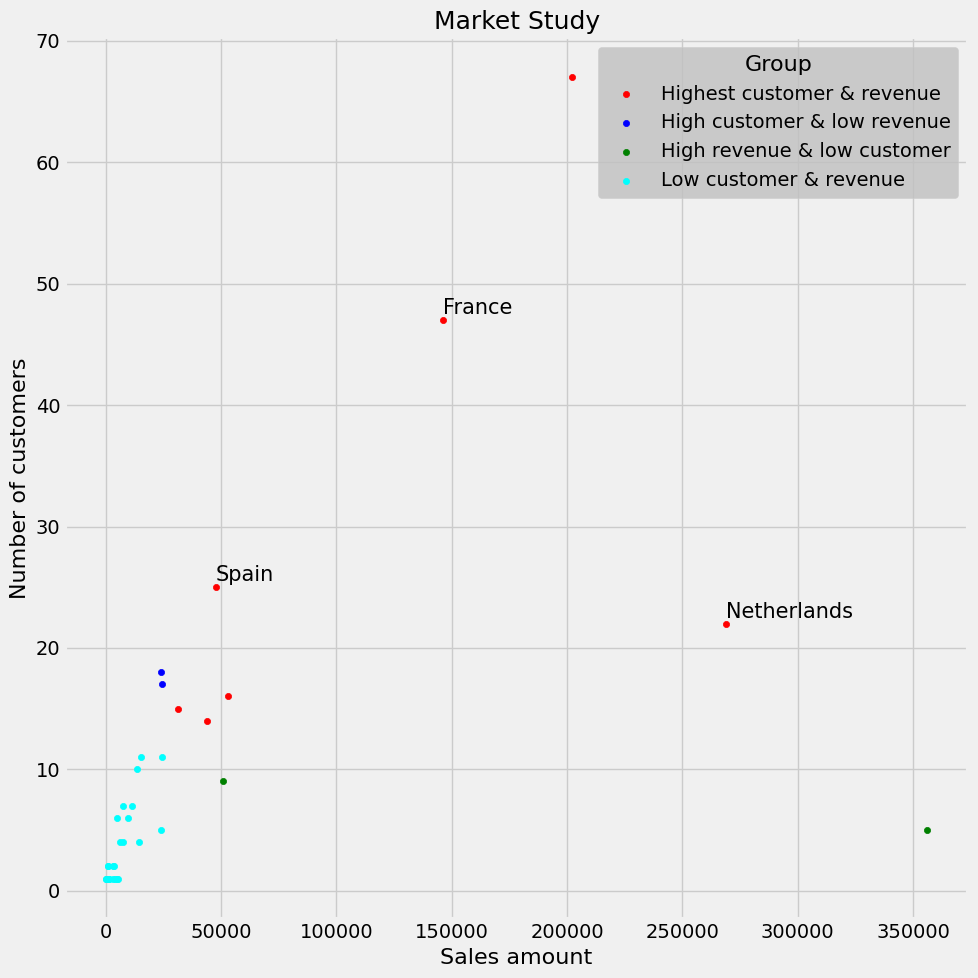

In [20]:
group_colors = {'Highest customer & revenue': 'red', 
                'High customer & low revenue': 'blue', 
                'High revenue & low customer': 'green', 
                'Low customer & revenue': 'cyan'}
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10, 10))
                        
for group, color in group_colors.items():
    group_data = df_new[df_new['group'] == group]
    ax.scatter(group_data['Sales'], group_data['CustomerId'], label=group, s=20, color=color)

def get_label_pos(country_data):
    sales = country_data['Sales'].iloc[0]
    customer_count = country_data['CustomerId'].iloc[0]

    x_pos = sales
    y_pos = customer_count + 0.5  

    return x_pos, y_pos
    
for country in ['France', 'Spain', 'Netherlands']:
    country_data = df_new[df_new['Country'] == country]
    x_pos, y_pos = get_label_pos(country_data)
    ax.text(x_pos, y_pos, country, fontsize=15)


ax.set_title('Market Study', fontsize=18)
ax.set_xlabel('Sales amount', fontsize=16)
ax.set_ylabel('Number of customers', fontsize=16)
ax.legend(title='Group', fontsize=14, title_fontsize=16, frameon=True, facecolor='silver', loc='upper right')

plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

last_day = df['InvoiceDate'].max() + pd.Timedelta(days=1)

df['Recency'] = (last_day - df['InvoiceDate']).dt.days

print(df[['CustomerId', 'Recency']].head())

last_day

   CustomerId  Recency
0     13085.0      374
1     13085.0      374
2     13085.0      374
3     13085.0      374
4     13085.0      374


Timestamp('2010-12-10 20:01:00')

In [23]:
last_purchase_dates = df.groupby('CustomerId')['InvoiceDate'].max().reset_index()

last_purchase_dates['InvoiceDate'] = pd.to_datetime(last_purchase_dates['InvoiceDate'])

last_purchase_dates['Recency'] = (last_day - last_purchase_dates['InvoiceDate']).dt.days

df_customer_segments = last_purchase_dates[['CustomerId', 'Recency']]

df_customer_segments.head()

,CustomerId,Recency
0,12346.0,165
1,12347.0,3
2,12348.0,74
3,12349.0,43
4,12351.0,11


In [24]:
unique_purchase_counts = df.groupby('CustomerId')['InvoiceNumber'].nunique().reset_index()

df_customer_segments['Frequency'] = unique_purchase_counts['InvoiceNumber']

df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346.0,165,11
1,12347.0,3,2
2,12348.0,74,1
3,12349.0,43,3
4,12351.0,11,1


In [25]:
df['MonetaryValue'] = df['Quantity'] * df['UnitPrice']

monetary_value = df.groupby('CustomerId')['MonetaryValue'].sum().reset_index()

df_customer_segments = pd.merge(df_customer_segments, monetary_value, on='CustomerId', how='left')

df_customer_segments.head()


,CustomerId,Recency,Frequency,MonetaryValue
0,12346.0,165,11,372.86
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,3,2671.14
4,12351.0,11,1,300.93


In [26]:
Q1 = df_customer_segments['Recency'].quantile(0.25)
Q2 = df_customer_segments['Recency'].quantile(0.5)
Q3 = df_customer_segments['Recency'].quantile(0.75)

df_customer_segments['R_quartile'] = pd.cut(df_customer_segments['Recency'], bins=[0, Q1, Q2, Q3, float('inf')], labels=[1, 2, 3, 4])

Q1 = df_customer_segments['Frequency'].quantile(0.25)
Q2 = df_customer_segments['Frequency'].quantile(0.5)
Q3 = df_customer_segments['Frequency'].quantile(0.75)

df_customer_segments['F_quartile'] = pd.cut(df_customer_segments['Frequency'], bins=[0, Q1, Q2, Q3, float('inf')], labels=[1, 2, 3, 4])

Q1 = df_customer_segments['MonetaryValue'].quantile(0.25)
Q2 = df_customer_segments['MonetaryValue'].quantile(0.5)
Q3 = df_customer_segments['MonetaryValue'].quantile(0.75)

df_customer_segments['M_quartile'] = pd.cut(df_customer_segments['MonetaryValue'], bins=[0, Q1, Q2, Q3, float('inf')], labels=[1, 2, 3, 4])

print(df_customer_segments.head())

df_customer_segments.head()

   CustomerId  Recency  Frequency  MonetaryValue R_quartile F_quartile  \
0     12346.0      165         11         372.86          4          4   
1     12347.0        3          2        1323.32          1          2   
2     12348.0       74          1         222.16          3          1   
3     12349.0       43          3        2671.14          2          3   
4     12351.0       11          1         300.93          1          1   

  M_quartile  
0          2  
1          3  
2          1  
3          4  
4          1  


,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile
0,12346.0,165,11,372.86,4,4,2
1,12347.0,3,2,1323.32,1,2,3
2,12348.0,74,1,222.16,3,1,1
3,12349.0,43,3,2671.14,2,3,4
4,12351.0,11,1,300.93,1,1,1


In [27]:
df_customer_segments['RFM'] = df_customer_segments['R_quartile'].astype(str) + df_customer_segments['F_quartile'].astype(str) + df_customer_segments['M_quartile'].astype(str)

df_customer_segments.head()


,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM
0,12346.0,165,11,372.86,4,4,2,442
1,12347.0,3,2,1323.32,1,2,3,123
2,12348.0,74,1,222.16,3,1,1,311
3,12349.0,43,3,2671.14,2,3,4,234
4,12351.0,11,1,300.93,1,1,1,111


In [28]:
def group_rfm(rfm_value):
    if rfm_value == '144':
        return 'Best'
    elif rfm_value == '344':
        return 'AlmostLost'
    elif rfm_value == '444':
        return 'LostBigSpenders'
    elif rfm_value == '441':
        return 'LostCheap'
    elif '4' in rfm_value[1]:
        return 'Loyal'
    elif '4' in rfm_value[2]:
        return 'BigSpenders'
    else:
        return 'Normal'

df_customer_segments['Segment'] = df_customer_segments['RFM'].apply(group_rfm)


df_customer_segments.head()


,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,442,Loyal
1,12347.0,3,2,1323.32,1,2,3,123,Normal
2,12348.0,74,1,222.16,3,1,1,311,Normal
3,12349.0,43,3,2671.14,2,3,4,234,BigSpenders
4,12351.0,11,1,300.93,1,1,1,111,Normal


In [29]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M').dt.to_timestamp()

df['FirstPurchaseDate'] = df.groupby('CustomerId')['InvoiceDate'].transform('min')

df['final_y'] = df.groupby('CustomerId')['FirstPurchaseDate'].transform('min')

invoice_year, invoice_month = get_date_int(df, 'InvoiceDate')
cohort_year, cohort_month = get_date_int(df, 'final_y')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['final_x'] = years_diff * 12 + months_diff + 1

cohort_data = df.groupby(['final_y', 'final_x'])['CustomerId'].apply(pd.Series.nunique)

final_df = cohort_data.reset_index().pivot(index='final_y', columns='final_x', values='CustomerId')

cohort_size = final_df.iloc[:, 0]
retention = (final_df.divide(cohort_size, axis=0) * 100).round(0)

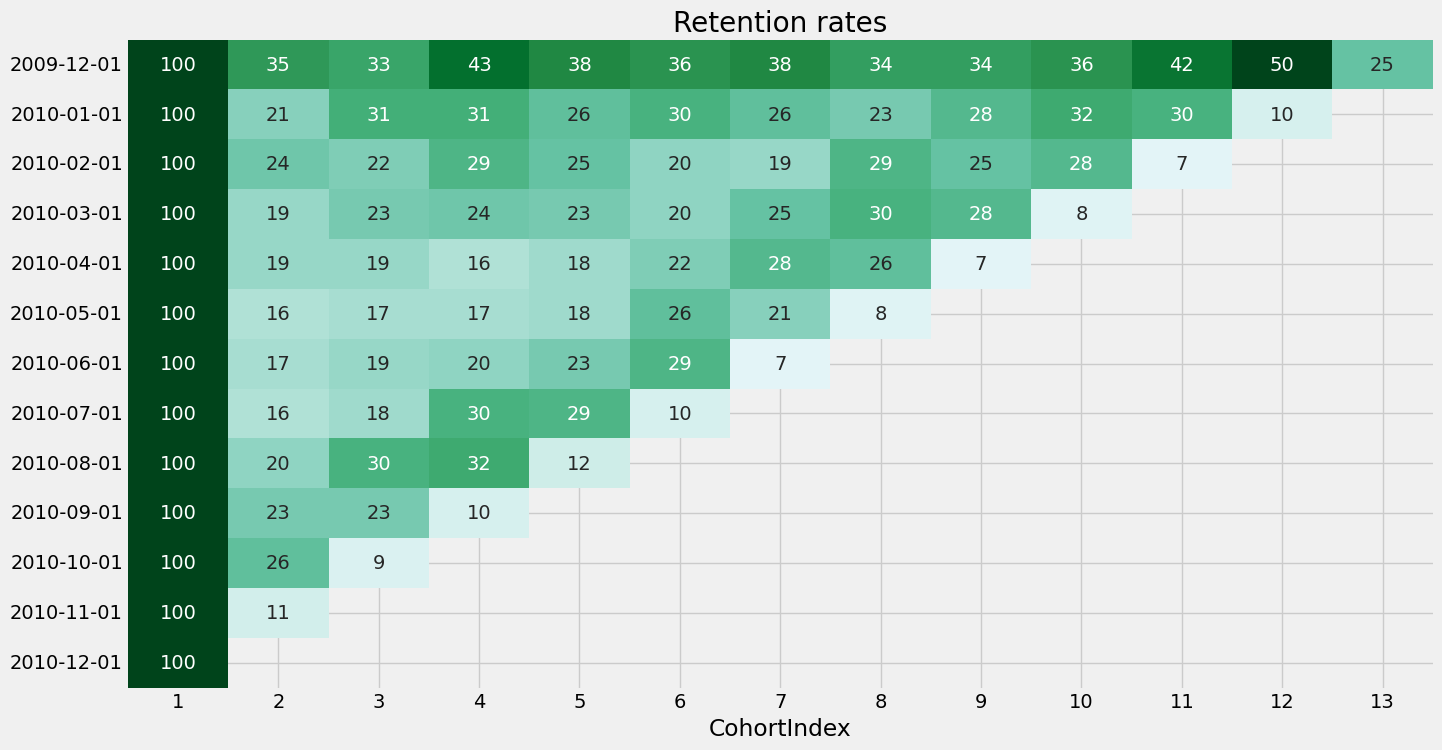

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(retention, annot=True, fmt='g', cmap='BuGn', cbar=False, vmin=0, vmax=50, ax=ax)

ax.set_title('Retention rates')
ax.set_xlabel('CohortIndex')

ax.set_ylabel('')

ax.set_yticklabels(retention.index.strftime('%Y-%m-%d'))

plt.show()
